# Gym Crowdedness Prediction<a id='top'></a>
&emsp;This [Dataquest guided project](https://app.dataquest.io/c/137/m/750/guided-project%3A-stochastic-gradient-descent-on-linear-regression/1/stochastic-gradient-descent-on-linear-regression) will utilize Stochastic Gradient Descent algorithm to establish the best fitted line which hopefully could accurately predict the crowdedness of the gym in given parameters.

1. [Data Exploration](#explore)  
  1.1 [Distributions](#distributions)  
  1.2 [Relationship Among Features](#relationship)

In [438]:
# Libraries
# array and dataframe
import numpy as np
import pandas as pd
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.style.use("fivethirtyeight")
# data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# model
from sklearn.linear_model import SGDRegressor
# evaluation
from sklearn.metrics import mean_squared_error

# Data Exploration<a id='explore'></a>

In [439]:
gym = pd.read_csv("crowdedness.csv")
# Check feature types
print(gym.shape)
print(gym.dtypes)
gym.head(2)

(62184, 11)
number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17


In [440]:
# Check missing values
gym.isna().sum().sum()

0

&emsp;The *timestamp* feature contains hour, minute, and second. However, it seems unnecessary to distinguish the difference in number of people within an hour time frame. So the feature *hour* can replace *timestamp*. Besides, *year* and *day* are extracted from *date*.

In [441]:
gym['day'] = gym['date'].str[8:10]
gym['year'] = gym['date'].str[:4]
gym['yyyymm'] = gym.apply(lambda x: x['year'] + str(x['month']) if len(str(x['month']))==2 else x['year'] + "0" + str(x['month']), axis=1)
gym.drop(columns=['timestamp','date'], inplace=True)
gym[['day', 'year', 'yyyymm']] = gym[['day', 'year', 'yyyymm']].astype(int)
gym.head(2)

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,year,yyyymm
0,37,4,0,0,71.76,0,0,8,17,14,2015,201508
1,45,4,0,0,71.76,0,0,8,17,14,2015,201508


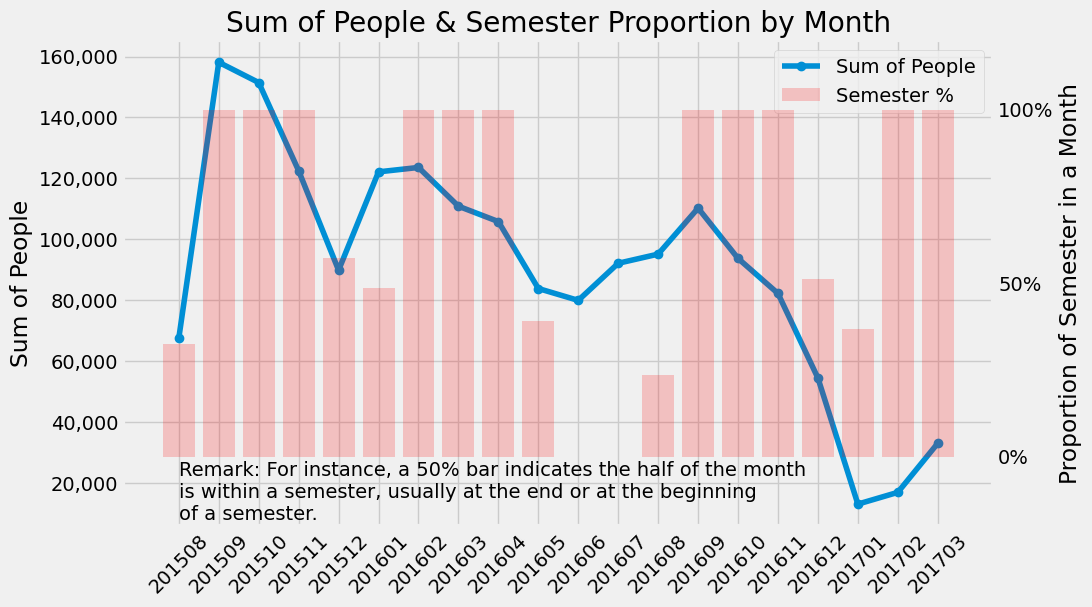

In [475]:
# Visualize trend
trend = gym.groupby('yyyymm')['number_people'].sum()
semester = gym.groupby('yyyymm')['is_during_semester'].mean()

fig, ax = plt.subplots(figsize=(10,6))
twin = ax.twinx()

ax.set_title("Sum of People & Semester Proportion by Month")

p1 = ax.plot([str(i) for i in trend.index], trend, marker='o', label='Sum of People')
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_xticks([str(i) for i in trend.index], [str(i) for i in trend.index], rotation=45)
ax.set(ylabel='Sum of People')
ax.grid(True)
ax.text("201508", 8000, "Remark: For instance, a 50% bar indicates the half of the month\nis within a semester, usually at the end or at the beginning\nof a semester.")

p2 = twin.bar([str(i) for i in semester.index], semester, alpha=.2, color='red', label='Semester %')
twin.set(ylim=(-.2,1.2), ylabel='Proportion of Semester in a Month')
twin.set_yticks([0, .5, 1])
twin.set_yticklabels(['0%', '50%', '100%'])
twin.grid(False)

ax.legend(handles=[p1[0],p2])
plt.show()

## Distributions<a id='distributions'></a>

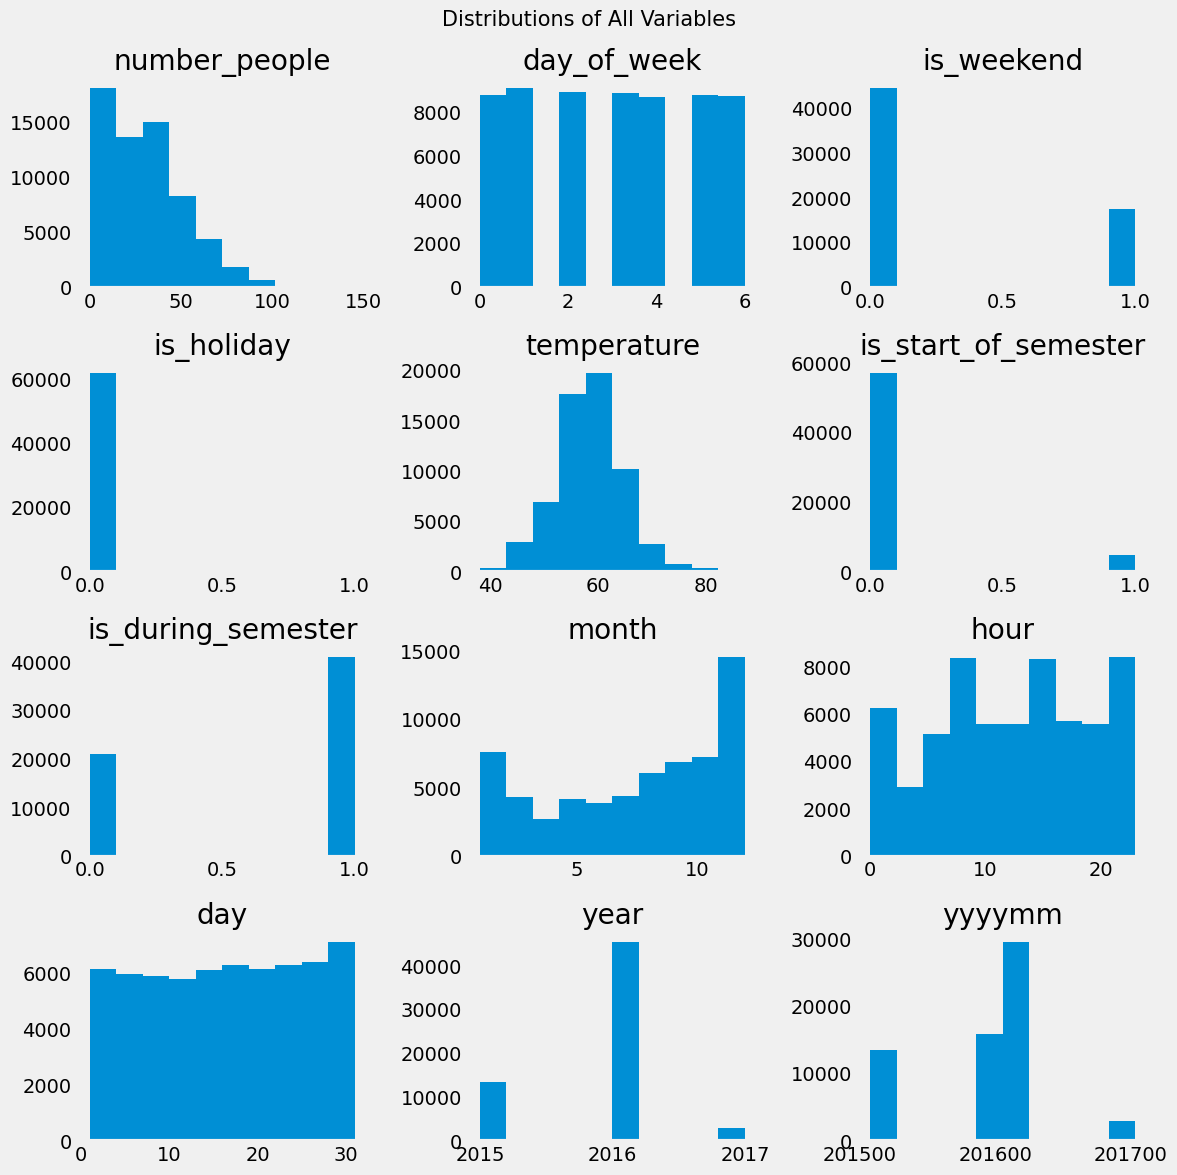

In [443]:
gym.hist(grid=False, figsize=(12,12))
plt.suptitle("Distributions of All Variables", fontsize=15)
plt.tight_layout()
plt.show()

&emsp;Most distributions are reasonable except for month and hour which have some imbalanced counts of values.

## Relationship Among Features<a id='relationships'></a>

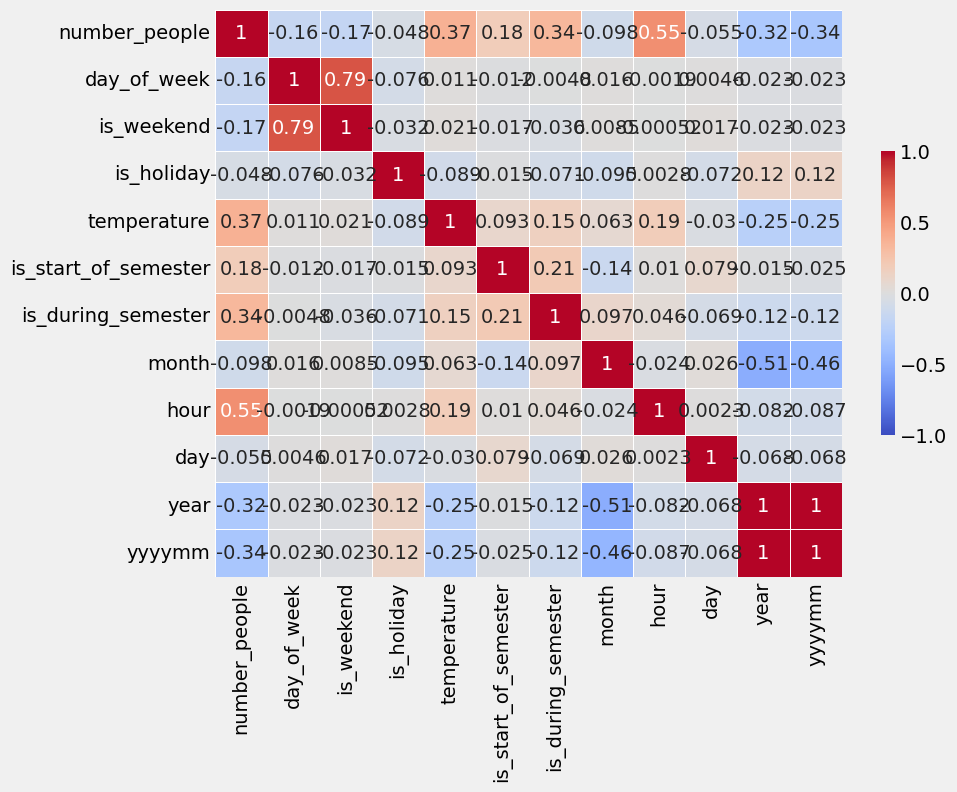

In [444]:
# Correlations without transformation
cor = gym.loc[:,gym.columns!='date'].corr()
plt.figure(figsize=(9,7))
sns.heatmap(cor, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [445]:
gym.columns

Index(['number_people', 'day_of_week', 'is_weekend', 'is_holiday',
       'temperature', 'is_start_of_semester', 'is_during_semester', 'month',
       'hour', 'day', 'year', 'yyyymm'],
      dtype='object')

ValueError: x and y must be the same size

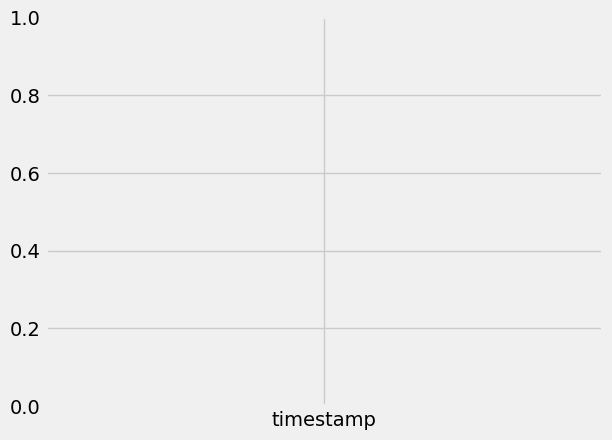

In [446]:
plt.scatter('timestamp','number_people',data=gym)

In [ ]:
# Scatterplots of number_people vs features
for f in gym.columns[1:]:
    

IndentationError: expected an indented block (2608924148.py, line 3)